# Computational Social Science Project #3 

**Enter your Name:** Reiley Reed

*Worked with: Sofia Guo, Marisa Tsai, Stacy Chen, Neena Albarus

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [195]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [196]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [197]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [198]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [199]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [200]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date']) 

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

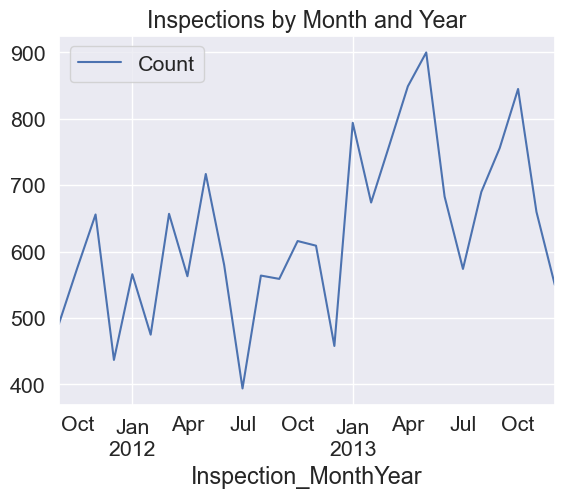

In [201]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

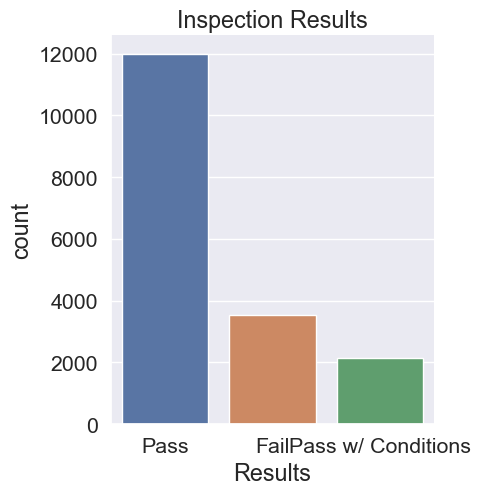

In [202]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

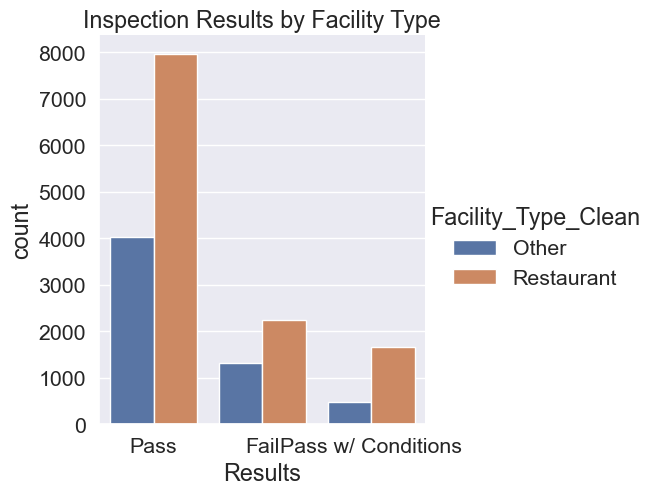

In [203]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [204]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [205]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                                                            'Facility_Type', 
                                                                                            'LICENSE_DESCRIPTION', 
                                                                                            'WARD_PRECINCT'])



# get dummies
X = pd.get_dummies(X)

In [206]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


In [207]:
#proportion of fails
y.sum()/len(y)

0.20161975050617204

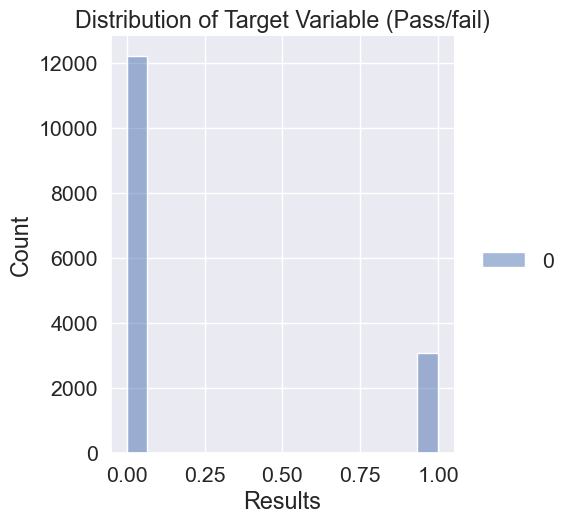

In [208]:
# distribution plot of the outcome variable
sns.displot(y)    # notice the default is a histogram
plt.title("Distribution of Target Variable (Pass/fail)")
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

In [209]:
#split our data into test/train
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y_train)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Logistic regression

**Basic Logic:** Logistic regression is a model used to predict binary outcomes and relies on the assumption that the data is balanced with regard to outcome classes in order for the model to learn from the variation in the data. 

**Pros:** It is good for prediction of binary variables. This model is also simple, easy to interpret and widely utilized for binary classification.

**Cons:** It is sensitive to multicollinearity, which is when more than two explanatory variables are related. Additionally, this model is not effective with imbalanced data (as described above). 

**Rationale:** This model is potentially appropriate for this analysis because of the binary outcome variable, whether or not a given restaurant passes or fails inspection. Given the simplicity of this model, it can serve as a type of baseline for us to compare other models with. 

In [210]:
#Logistic regression code
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

In [211]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

In [212]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=2)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9163945133899413


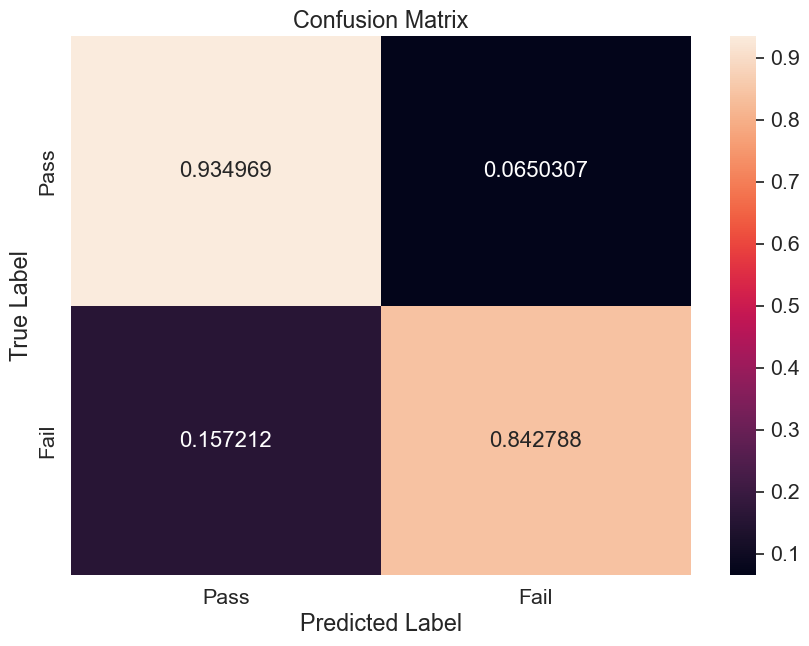

In [213]:
# specify confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             best_logit_pred, 
                             normalize = "true")

# convert to dataframe
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))

# label dataframe 
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]

# plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###  Model 2: Random Forest

**Logic:** Random Forest is decision treet method, also referred to as a "bagging" method, in which trees are created from random samples with replacement. This model grows decision "trees" that make binary predictions. The most common response outcome in the forest determines the answer. It is also considered a bagging method, given that the trees are created based on random samples with replacement. 

**Pros:** This model can be used on data that has more features than cases and is able to manage overfitting by training on random samples with repalcement. Additionally, it is easily to understand because the terminal nodes can be tallied to provide the final answer. 

**Cons:** There is some risk of overfitting the model to the data. 

**Rationale:** This model is appropriate for this analysis given that there are many features for the model to train on. It is also helpful for us to see if this model performs better than logistic regression. 

In [214]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)   # random seed

# Train the classifier using the training data
rf_model = rf_classifier.fit(X_train, y_train)

In [215]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X_train, 
                         y_train.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [216]:
# calculate the average score across models
# ----------
scores.mean()

0.9246684196154135

### Model 3: Adaptive Boosting

**Logic:** Adaptive Boosting uses residuals from prediction error to grow "trees" and averages predictions of the trees that result, allowing the model to learn and improve its ability to correctly make classification selections. 

**Pros:** Frequently makes more accurate predictions than Random Forest, given its emphasis on adaptation in response to misclassification. 

**Cons:** Susceptible to overfitting, given its ability to learn/adapt based on previous classification errors.

**Rationale:** It is typically used for binary classification, which is why it may be particularly appropriate for this analysis. Additionally, given that it often performs better than Random Forest, it provides an additional comparison to that model. 

In [217]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

# Train the classifier using the training data
ada_model = ada_classifier.fit(X_train, y_train)

In [218]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X_train,               # specify features
                         y_train.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [219]:
# calculate mean score across models 
# ----------
scores.mean()

0.9184625308686218

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [220]:
#Validate the models: 
    
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Define the metrics as scorers
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Perform cross-validation and calculate metrics for each model
for model_name, model in models.items():
    print(f"\n{model_name}:\n")
    
    # Perform cross-validation for each metric
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
        avg_score = scores.mean()
        print(f"{metric_name}: {avg_score:.4f}")


Logistic Regression:

Accuracy: 0.9206
Precision: 0.7759
Recall: 0.8531
F1: 0.8125

Random Forest:

Accuracy: 0.9278
Precision: 0.7768
Recall: 0.9050
F1: 0.8333

AdaBoost:

Accuracy: 0.9180
Precision: 0.7840
Recall: 0.8196
F1: 0.8013


For this context I would priotrize the F1 score given the class imbalance, which, as described below, could potentially lead to a misleading accuracy scores. However, F1 scores, which are calculated by taking the product of precision and recall divided by the sum of precision and recall, achieve more balance between false positives and false negatives. Given that the Random Forest F1 score is closest to 1, this model is the best choice.       

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

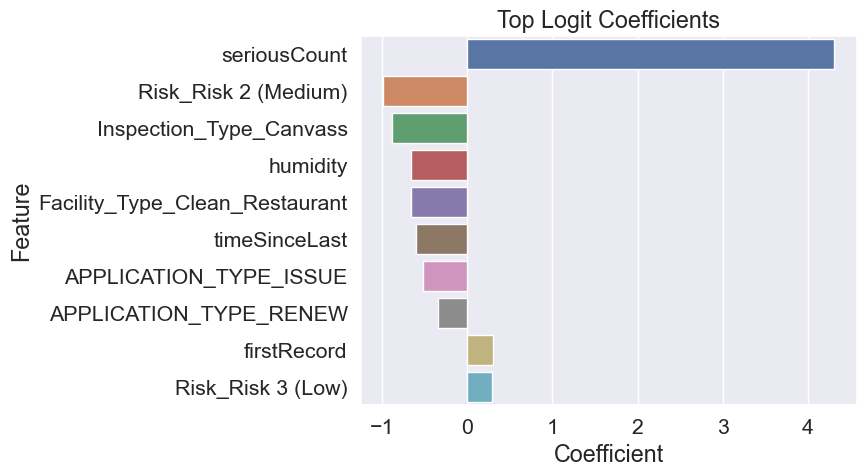

In [221]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

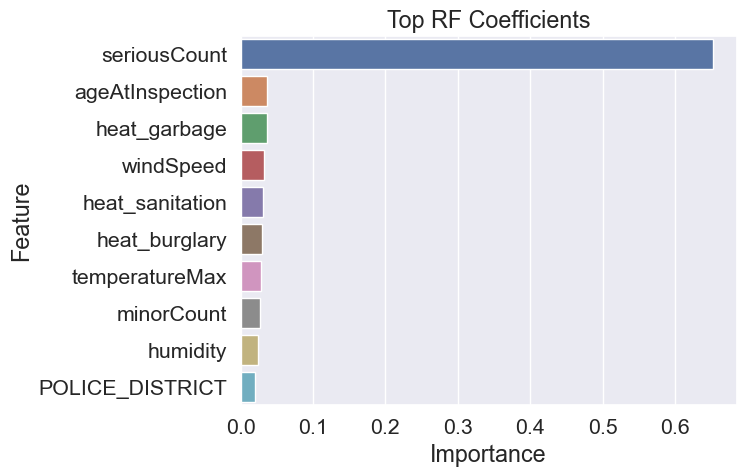

In [222]:
# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_model.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')).set_title("Top RF Coefficients") # identify the 10 most important features
plt.show()

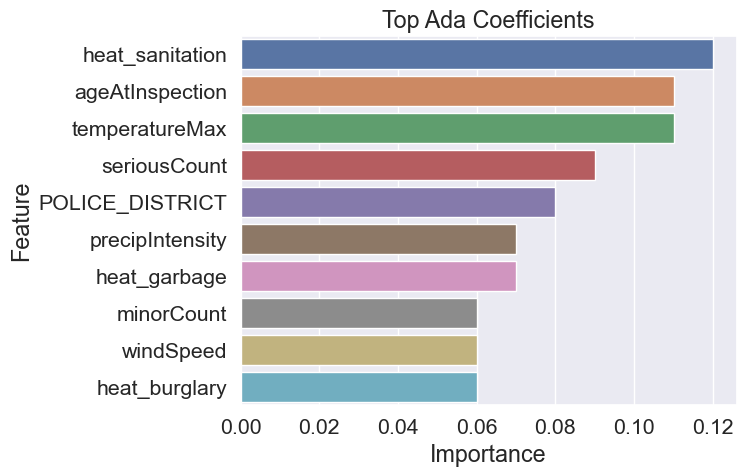

In [223]:
# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_model.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')).set_title("Top Ada Coefficients") # identify the 10 most important features
plt.show()

The most important three features for each model are different. Random Forest includes seriousCount, ageAtInspection and heat_garbage as the top 3 features. While Random Forest and Logit both identify seriousCount as the top most important feature, AdaBoost finds heat_sanitation, ageAtInspection and temperatureMax to be the most important, folowed by seriousCount as the 4th most important. Some other important features that might be good to include here are around working environment, particularly sanitation practices (such as handwashing, keeping workstations clean etc) and suport for workers taking sick days (to decrease likelihood of attending work while sick).    

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [224]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# Get predicted values for the random forest model
rf_pred = rf_model.predict(X_test)

# Using predict_proba() to predict probabilities for test data
proba_predictions = rf_classifier.predict_proba(X_test)

In [225]:
proba_predictions 

#the first number in each row is the probability of a 0=Pass prediction;
# the second number is the probability of a 1=Fail prediction

array([[1.  , 0.  ],
       [0.24, 0.76],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.32, 0.68]])

In [226]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Get the probabilities for class 1 (second column)
class_1_probabilities = proba_predictions[:, 1]

# Sort the indices based on the probabilities of class 1 in descending order
sorted_indices = np.argsort(class_1_probabilities)[::-1]

# Sort the proba_predictions array based on sorted indices
sorted_proba_predictions = proba_predictions[sorted_indices]

sorted_proba_predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

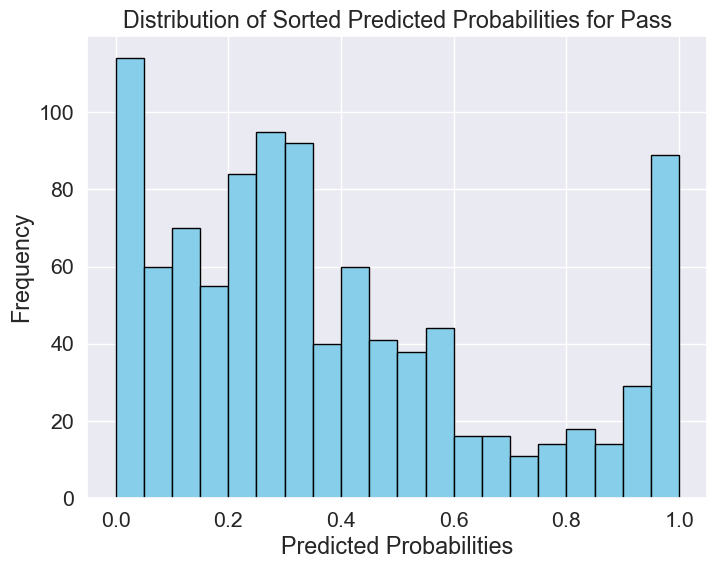

In [227]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# get the first 1,000 observations (indices 0 to 999)
num_observations = 1000
probabilities = sorted_proba_predictions[:num_observations, 0]  # Probabilities for Pass

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for Pass')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

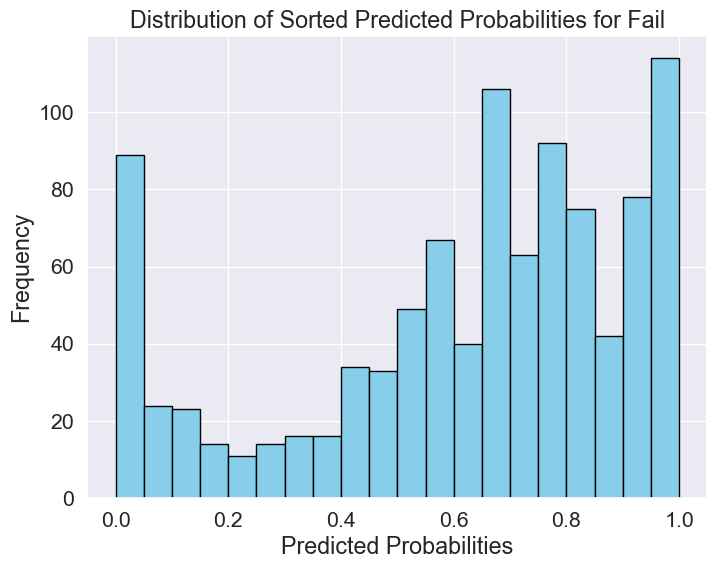

In [228]:
probabilities_1 = sorted_proba_predictions[:num_observations, 1]  # Probabilities for Fail

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities_1, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for Fail')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [229]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

# Get the total number of observations in your dataset
total_observations = X.shape[0]

# Set the number of observations to audit (1000 in this case)
num_observations_to_audit = 1000

# Randomly select 1000 rows from the dataset without replacement
subset_data = X.sample(n=num_observations_to_audit, replace=False)

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [230]:
# data processing

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)



In [231]:
df2 = chicago_inspections_2014

In [232]:
df1 = chicago_inspections_2011_to_2013

In [233]:
common_columns = df1.columns.intersection(df2.columns)
common_columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

In [234]:
#select the columns that are relevant for the 2014 dataset
X_full = chicago_inspections_2014[['Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound']]

# drop datetime info
# -----------
X_full = X_full.dropna()

In [235]:
# drop missing vals
X14 = X_full.dropna()

# -----------
y14 = X14['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y14 = y14.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y14 = lb_style.fit_transform(y14)

# recode 0s and 1s so 1s are "Fail"
y14 = np.where(y14 == 1, 0 ,1)


# process features
# -----------

# process features
X_test2014 = X14.drop(columns = ['Results'])
X_test2014 = pd.get_dummies(X_test2014)      

# process target 
y_test2014 = y14

In [236]:
# predict and compare using already trained rf_classifier
# -----------
# Get predicted values for the random forest model that we chose
rf14_pred=rf_model.predict(X_test2014)

In [237]:
#calculate accuracy score for rf14_pred
accuracy_score(y_test2014, rf14_pred)

0.8958862366683595

In [238]:
#calculate precision
precision_score(y_test2014, rf14_pred)

0.70917225950783

In [239]:
#calculate recall
recall_score(y_test2014,rf14_pred)

0.8086734693877551

In [240]:
#calculate F1
f1_score(y_test2014,rf14_pred)

0.7556615017878427

As noted above, the F1 score achieves more balance between false positives and false negatives compared to other metrics, which is why it is the most important score to consider for assessing these results. The the F1 score of 2014 test data (.7556) was lower than the F1 from the Random Forest model (.8334). With regard to the recall score, the original model had a higher score, 0.8 compared to 0.9, which means that it had better ability to avoid false negatives. The original model also had higher precision score, which means that it had better ability to avoid false positives. Put together, this tells us that the lower F1 score from the 2014 data is due to lower precision and recall on the 2014 test data. 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Accuracy, which is the proportion of correct predictions among the total number of predictions, is not necessarily the best metric for identifying the most appropriate model in the context of social sciences in public policy. This is due to the fact that a model may be able to achieve very high accuracy when applied to datasets that have much more representation from some classifications over others. For example, a model that just predicts one classification may have a high accuracy score when applied to an unbalanced data if it happens to predict that one classification most of the time. However, that does not necessarily mean that it would function well in other contexts. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

If restaurants began adjusting their behaviors to avoid being flagged for onsite audits and this led to the algorithm no longer accurately detecting true positives, then I see two potential options for addressing this issue: 1) You could adjust the model so that it no longer includes the features that restaurants have adjusted to. This would potentially mean that the model no longer functions as well. 2) Another potential option might be to stop using an algorithm to determine what restaurants should be audited and just randomly conduct site visits, so that there truly is no way for sites to avoid them by adjusting their behavior. However, this option may lead to inefficiently using resources for audits, given that restaurants at lower risk for violations would certainly be included in more audits than if you used a more targeted approach. 